## 60.単語ベクトルの読み込みと表示

In [1]:
import gensim
import numpy as np

In [2]:
# configs
GOOGLE_MODEL_PATH = './ch7_folder/model/GoogleNews-vectors-negative300.bin'

In [3]:
model = gensim.models.KeyedVectors.load_word2vec_format(GOOGLE_MODEL_PATH, binary=True)

In [4]:
model['United_States']

array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

In [5]:
model['United_States'].shape

(300,)

In [6]:
type(model['United_States'])

numpy.ndarray

## 61.単語の類似度 & 62.類似度の高い単語10件 & 63.加法構成性によるアナロジー

In [7]:
from common_utils import cosine_similarity

In [8]:
vec_united_states = model['United_States']
vec_us = model['U.S.']
cosine_similarity(vec_united_states, vec_us)

0.7310775

In [9]:
model.wv.most_similar([vec_united_states],[],10)

/Users/yoshidatomoya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


[('United_States', 1.0),
 ('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792)]

In [10]:
vec_spain = model['Spain']
vec_madrid = model['Madrid']
vec_athens = model['Athens']
model.wv.most_similar([vec_spain - vec_madrid + vec_athens],[],10)

/Users/yoshidatomoya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


[('Athens', 0.7528455853462219),
 ('Greece', 0.6685472726821899),
 ('Aristeidis_Grigoriadis', 0.5495778322219849),
 ('Ioannis_Drymonakos', 0.5361456871032715),
 ('Greeks', 0.5351786613464355),
 ('Ioannis_Christou', 0.5330226421356201),
 ('Hrysopiyi_Devetzi', 0.5088489055633545),
 ('Iraklion', 0.5059264898300171),
 ('Greek', 0.5040615797042847),
 ('Athens_Greece', 0.5034109354019165)]

In [11]:
model.wv.most_similar([vec_spain - vec_madrid + vec_athens],[],1)[0]

/Users/yoshidatomoya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


('Athens', 0.7528455853462219)

## 64.アナロジーデータでの実験 & 65.アナロジータスクでの正解率

　単語アナロジーの評価データには6章とちがって`readme.txt`が存在しないため、少し補足をします。
`: var`と書いてある文字列があります、これは次の`: foo`までの文字列が何のジャンルに関するかを表しています。
辞書のキーみたいなものだと思ってください。
`:var`の下には半角スペースで区切られた文字が4つ並んでいます。`var`に関する文字列です。

　他の文字列については、具体例を用いて説明します。
`: capital-common-countries`というジャンルの下に`Athens Greece Baghdad Iraq`という文字列があります。これらの関係は意味的な演算として、

$$
  \text{Greece} -\text{Athens} + \text{Baghdad} = \text{Iraq}
$$

という関係性になってます。これを先ほど使ったモデルを使って解析していきます。

In [12]:
import os
import pandas as pd
from common_utils import make_csv

In [13]:
# configs
QUESTIONS_WORDS_PATH = './ch7_folder/questions-words.txt'
SAVE_DATA_PATH = './ch7_folder/save_data/'

In [14]:
if not os.path.exists(SAVE_DATA_PATH):
    os.makedirs(SAVE_DATA_PATH)

In [15]:
with open(QUESTIONS_WORDS_PATH, mode='r', encoding='utf-8') as f:
    questions_words_readlines_list = [s.strip() for s in f.readlines()]

問題には書いてありませんが、`: var`ごとにCSVを作ると便利そうなのでCSVに変換します

In [16]:
HEADERS = ['FIRST', 'SECOND', 'THIRD', 'ANSWER']

In [17]:
key_indexes_list = [questions_words_readlines_list.index(word) 
              for word in questions_words_readlines_list if ':' in word]

for i in range(len(key_indexes_list)):
    index_num = key_indexes_list[i]
    csv_name = questions_words_readlines_list[index_num][2:]
    keyword_index = key_indexes_list.index(index_num)
    
    if keyword_index < 12:
        next_index_num = key_indexes_list[i + 1]
        tmp_list = questions_words_readlines_list[(index_num + 1):next_index_num]
    else:
        tmp_list = questions_words_readlines_list[(index_num + 1):]
    tmp_split_list = [word.split() for word in tmp_list]
    
    csv_path = SAVE_DATA_PATH + csv_name + '.csv'
    make_csv(csv_path, tmp_split_list, HEADERS)

./ch7_folder/save_data/capital-common-countries.csvはもう存在しています
./ch7_folder/save_data/capital-world.csvはもう存在しています
./ch7_folder/save_data/currency.csvはもう存在しています
./ch7_folder/save_data/city-in-state.csvはもう存在しています
./ch7_folder/save_data/family.csvはもう存在しています
./ch7_folder/save_data/gram1-adjective-to-adverb.csvはもう存在しています
./ch7_folder/save_data/gram2-opposite.csvはもう存在しています
./ch7_folder/save_data/gram3-comparative.csvはもう存在しています
./ch7_folder/save_data/gram4-superlative.csvはもう存在しています
./ch7_folder/save_data/gram5-present-participle.csvはもう存在しています
./ch7_folder/save_data/gram6-nationality-adjective.csvはもう存在しています
./ch7_folder/save_data/gram7-past-tense.csvはもう存在しています
./ch7_folder/save_data/gram8-plural.csvはもう存在しています
./ch7_folder/save_data/gram9-plural-verbs.csvはもう存在しています


準備をいろいろしていきます。

In [18]:
CAPITAL_COMMON_CSV_PATH = './ch7_folder/save_data/capital-common-countries.csv'
CAPITAL_WORLD_CSV_PATH = './ch7_folder/save_data/capital-world.csv'
CURRENCY_CSV_PATH = './ch7_folder/save_data/currency.csv'
CITY_CSV_PATH = './ch7_folder/save_data/city-in-state.csv'
FAMILY_CSV_PATH = './ch7_folder/save_data/family.csv'
GRAM1_CSV_PATH = './ch7_folder/save_data/gram1-adjective-to-adverb.csv'
GRAM2_CSV_PATH = './ch7_folder/save_data/gram2-opposite.csv'
GRAM3_CSV_PATH = './ch7_folder/save_data/gram3-comparative.csv'
GRAM4_CSV_PATH = './ch7_folder/save_data/gram4-superlative.csv'
GRAM5_CSV_PATH = './ch7_folder/save_data/gram5-present-participle.csv'
GRAM6_CSV_PATH = './ch7_folder/save_data/gram6-nationality-adjective.csv'
GRAM7_CSV_PATH = './ch7_folder/save_data/gram7-past-tense.csv'
GRAM8_CSV_PATH = './ch7_folder/save_data/gram8-plural.csv'
GRAM9_CSV_PATH = './ch7_folder/save_data/gram9-plural-verbs.csv'

In [19]:
df_capital_common = pd.read_csv(CAPITAL_COMMON_CSV_PATH)
df_capital_world = pd.read_csv(CAPITAL_WORLD_CSV_PATH)
df_gram1 = pd.read_csv(GRAM1_CSV_PATH)

CSVの中身をみてみるとこんな感じになってます。

In [20]:
df_capital_common[:10]

,FIRST,SECOND,THIRD,ANSWER
0,Athens,Greece,Baghdad,Iraq
1,Athens,Greece,Bangkok,Thailand
2,Athens,Greece,Beijing,China
3,Athens,Greece,Berlin,Germany
4,Athens,Greece,Bern,Switzerland
5,Athens,Greece,Cairo,Egypt
6,Athens,Greece,Canberra,Australia
7,Athens,Greece,Hanoi,Vietnam
8,Athens,Greece,Havana,Cuba
9,Athens,Greece,Helsinki,Finland


In [21]:
df_gram1[:10]

,FIRST,SECOND,THIRD,ANSWER
0,amazing,amazingly,apparent,apparently
1,amazing,amazingly,calm,calmly
2,amazing,amazingly,cheerful,cheerfully
3,amazing,amazingly,complete,completely
4,amazing,amazingly,efficient,efficiently
5,amazing,amazingly,fortunate,fortunately
6,amazing,amazingly,free,freely
7,amazing,amazingly,furious,furiously
8,amazing,amazingly,happy,happily
9,amazing,amazingly,immediate,immediately


64で書いてある課題を行うための準備をします。

In [22]:
def check_analogy(row):
    vec_predict = model[row['SECOND']] - model[row['FIRST']] + model[row['THIRD']]
    most_similarity_word, similarity_value = model.wv.most_similar([vec_predict],[],1)[0]
    return pd.Series([most_similarity_word, similarity_value])

In [23]:
%%time
df_capital_common[['PREDICT_WORD', 'SIMILARITY_VALUE']] = df_capital_common.apply(check_analogy, axis=1)

/Users/yoshidatomoya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 7min 37s, sys: 23.3 s, total: 8min
Wall time: 1min 22s


In [24]:
%%time
df_gram1[['PREDICT_WORD', 'SIMILARITY_VALUE']] = df_gram1.apply(check_analogy, axis=1)

/Users/yoshidatomoya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  This is separate from the ipykernel package so we can avoid doing imports until


CPU times: user 14min 53s, sys: 43.2 s, total: 15min 36s
Wall time: 2min 40s


In [25]:
df_capital_common[:10]

,FIRST,SECOND,THIRD,ANSWER,PREDICT_WORD,SIMILARITY_VALUE
0,Athens,Greece,Baghdad,Iraq,Baghdad,0.748983
1,Athens,Greece,Bangkok,Thailand,Bangkok,0.743114
2,Athens,Greece,Beijing,China,China,0.718659
3,Athens,Greece,Berlin,Germany,Germany,0.672089
4,Athens,Greece,Bern,Switzerland,Bern,0.690234
5,Athens,Greece,Cairo,Egypt,Egypt,0.762682
6,Athens,Greece,Canberra,Australia,Canberra,0.740721
7,Athens,Greece,Hanoi,Vietnam,Hanoi,0.750990
8,Athens,Greece,Havana,Cuba,Havana,0.726283
9,Athens,Greece,Helsinki,Finland,Helsinki,0.723530


In [26]:
def analogy_accurancy(df):
    denominator = len(df)
    numerator = (df['ANSWER']  == df['PREDICT_WORD']).sum()
    return (numerator / denominator) * 100

In [27]:
analogy_accurancy(df_capital_common)

35.37549407114625

In [28]:
analogy_accurancy(df_gram1)

1.7137096774193548

意味的アナロジーの方が正解率は高そうですね。

## 66. WordSimilarity-353での評価

In [29]:
from scipy.stats import spearmanr

In [30]:
# configs
WORD_SIM_PATH = './ch7_folder/wordsim353/'

In [31]:
combined_csv_path = WORD_SIM_PATH + 'combined.csv'

In [32]:
df_combined = pd.read_csv(combined_csv_path)

In [33]:
df_combined[:10]

,Word 1,Word 2,Human (mean)
0,love,sex,6.77
1,tiger,cat,7.35
2,tiger,tiger,10.00
3,book,paper,7.46
4,computer,keyboard,7.62
5,computer,internet,7.58
6,plane,car,5.77
7,train,car,6.31
8,telephone,communication,7.50
9,television,radio,6.77


In [34]:
def words2similarity(row):
    vec1 = model[row['Word 1']]
    vec2 = model[row['Word 2']]
    return cosine_similarity(vec1,vec2)

In [35]:
df_combined['SIMILARITY_VALUE'] = df_combined.apply(words2similarity ,axis=1)

In [36]:
human_similarity_list = df_combined['Human (mean)'].values.tolist()
cosine_similarity_list = df_combined['SIMILARITY_VALUE'].values.tolist()
spearmanr(human_similarity_list, cosine_similarity_list)

SpearmanrResult(correlation=0.7000166486272194, pvalue=2.86866666051422e-53)

In [37]:
type(spearmanr(human_similarity_list, cosine_similarity_list))

scipy.stats.stats.SpearmanrResult

## 67.k-meansクラスタリング

ただの余談なんですが、問題文にある『国名に関する単語ベクトルを抽出し，...』と書いてあるんですが、これって全ての国名って意味なんですかね。とりあえずここから国名を取ってきました。`https://www.jpo.go.jp/system/patent/pct/tetuzuki/document/kuni-meisho/kuni-meisho-ichiran.pdf`

In [38]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import japanize_matplotlib

In [39]:
COUNTRY_NAME_PATH = './ch7_folder/country.txt'

In [40]:
with open(COUNTRY_NAME_PATH, mode='r') as f:
    country_names_list = [s.strip().replace(' ', '_') for s in f.readlines()]
country_names_list.append('United_States')

In [41]:
model_vocab_list = list(model.wv.vocab.keys())
model_country_names_list = [ word for word in country_names_list if word in model_vocab_list ]

/Users/yoshidatomoya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.


In [42]:
X = np.array([model[word] for word in model_country_names_list])

In [43]:
kmeans_model = KMeans(n_clusters=5, random_state=10).fit(X)

In [44]:
kmeans_model.labels_

array([1, 1, 1, 4, 4, 0, 2, 1, 1, 0, 1, 4, 4, 1, 4, 4, 4, 4, 0, 1, 4, 2,
       2, 4, 1, 0, 0, 2, 4, 1, 4, 1, 0, 2, 3, 1, 4, 1, 0, 0, 0, 4, 0, 1,
       2, 1, 3, 4, 2, 4, 3, 1, 3, 1, 0, 2, 0, 2, 0, 4, 3, 0, 1, 0, 0, 3,
       1, 4, 0, 1, 1, 0, 1, 2, 4, 1, 1, 3, 0, 0, 3, 0, 3, 4, 4, 1, 0, 4,
       0, 2, 3, 1, 1, 0, 2, 3, 4, 1, 3, 0, 3, 0, 3, 2, 0, 4, 3, 4, 1, 4,
       2, 4, 1, 2, 3, 3, 3, 2, 3, 1, 4, 3, 2, 1, 4, 2, 1, 1, 0, 4, 0, 4,
       0, 2, 1, 3, 2, 1, 1, 0, 2, 1, 2, 3, 0, 0, 0, 1, 4, 0, 4, 2, 3, 0,
       0, 1, 3, 4, 4, 1, 4, 1, 1, 4, 1, 0, 1, 1, 0, 0, 4, 4], dtype=int32)

この結果を主成分分析して二次元データにプロットします。

In [45]:
labels = kmeans_model.labels_
color_codes = {0: '#DD1F30', 1:'#2058DB', 2:'#32D820', 3:'#D69F20', 4:'#7FFFD4'}
colors = [color_codes[x] for x in labels]

In [46]:
pca = PCA()
pca.fit(X)
feature = pca.transform(X)

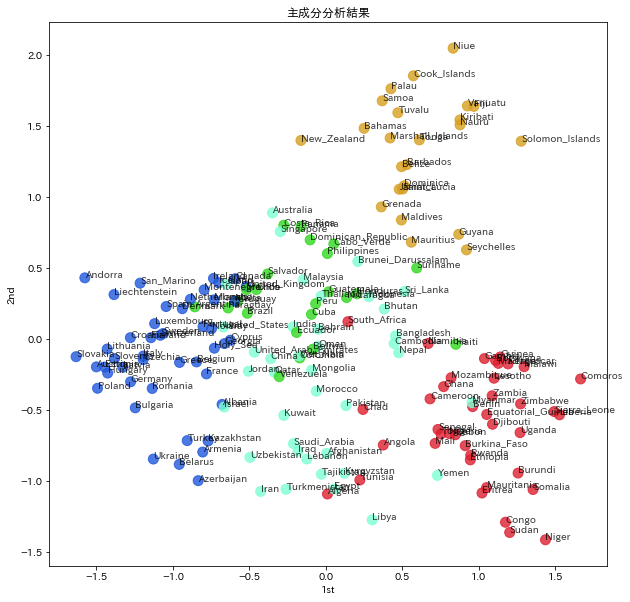

In [47]:
plt.figure(figsize=(10,10))
for x, y, country_name in zip(feature[:, 0], feature[:,1], model_country_names_list):
    plt.text(x, y, country_name, alpha=0.8, size=10)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, color=colors, s=100)
plt.title('主成分分析結果')
plt.xlabel("1st")
plt.ylabel("2nd")
plt.show()

## 68.Ward法によるクラスタリング

In [48]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [49]:
Z = linkage(X,method='ward',metric='euclidean')

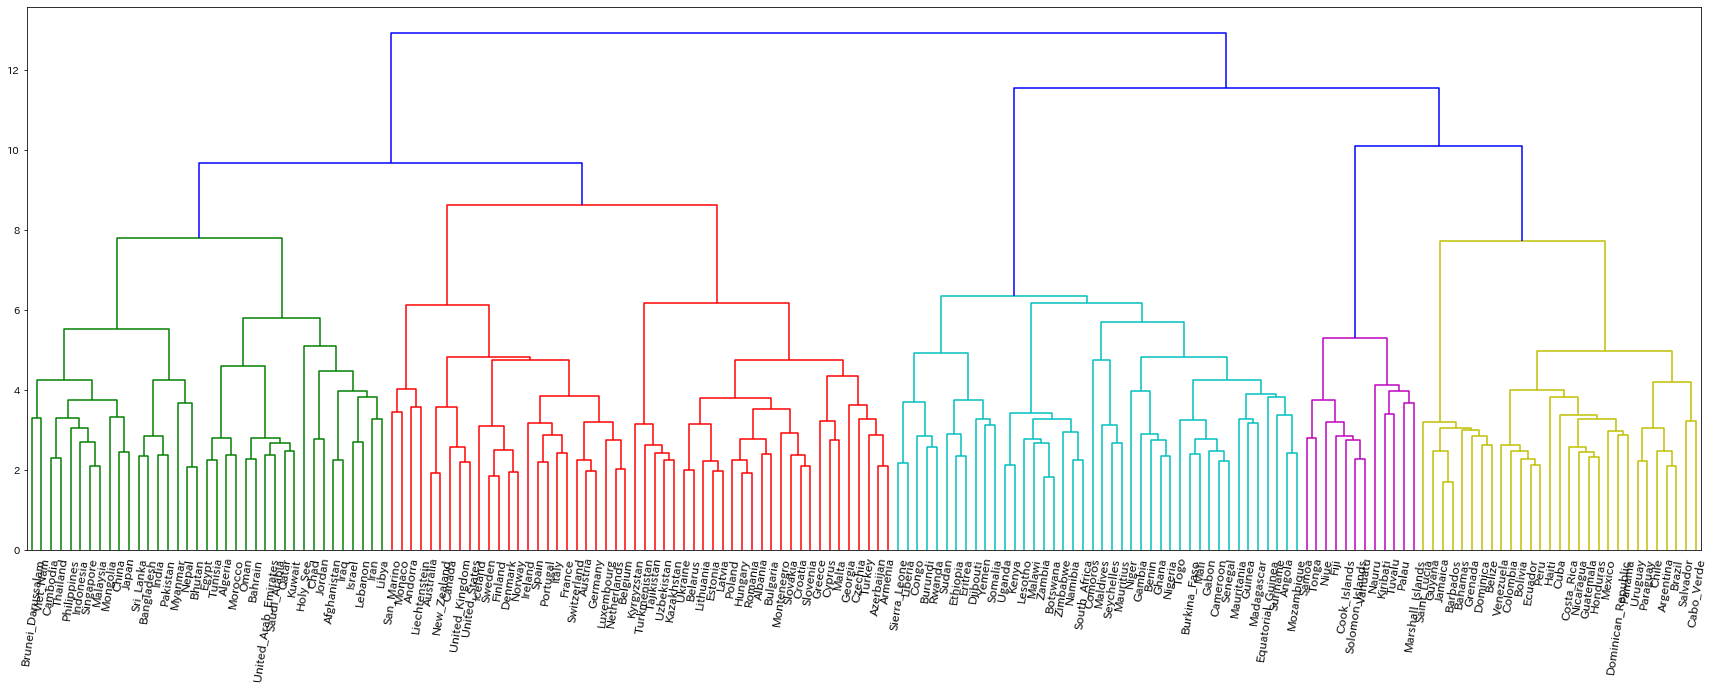

In [50]:
plt.figure(figsize=(30,10))
dendrogram_dict = dendrogram(Z, leaf_font_size=12,leaf_rotation=82 ,labels=model_country_names_list)

## 69.t-SNEによる可視化

In [51]:
from sklearn.manifold import TSNE

In [52]:
X_reduced = TSNE(n_components=2, random_state=10).fit_transform(X)

In [53]:
X_reduced.shape

(172, 2)

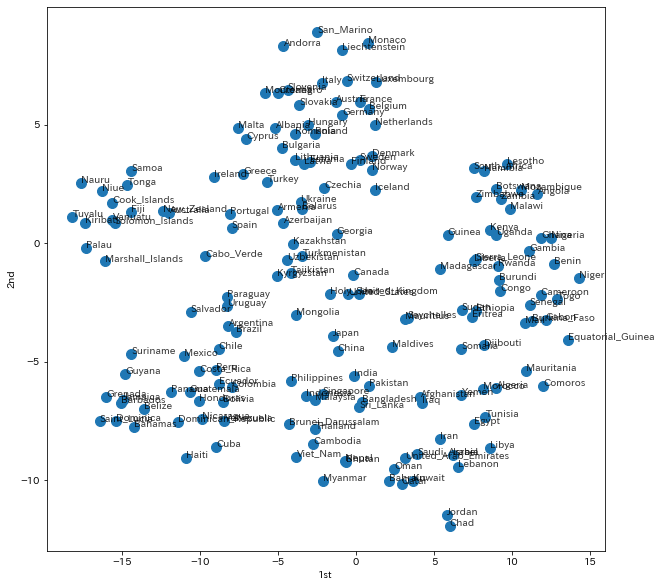

In [54]:
plt.figure(figsize=(10,10))
for x, y, country_name in zip(X_reduced[:, 0], X_reduced[:, 1], model_country_names_list):
    plt.text(x, y, country_name, alpha=0.8, size=10)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=100)
plt.xlabel("1st")
plt.ylabel("2nd")
plt.show()